In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [34]:
df = pd.read_csv('data_stocks.csv')

In [35]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [41]:
df.shape

(41266, 502)

In [42]:
from math import sqrt

In [83]:
df.pct_change().mean() 

DATE           2.100861e-07
SP500          1.106816e-06
NASDAQ.AAL     1.749893e-06
NASDAQ.AAPL    3.394429e-06
NASDAQ.ADBE    4.540957e-06
                   ...     
NYSE.XRX       7.520057e-05
NYSE.XYL       5.317645e-06
NYSE.YUM       4.568353e-06
NYSE.ZBH      -1.334526e-06
NYSE.ZTS       4.047636e-06
Length: 502, dtype: float64

In [86]:
ret = df.pct_change().mean() * 252
variance = df.pct_change().std() * sqrt(252)

In [87]:
ret_var = pd.concat([ret, variance], axis = 1).dropna()
ret_var.drop('DATE', inplace = True)
ret_var.columns = ["Returns","Variance"]


In [88]:
ret_var

,Returns,Variance
SP500,0.000279,0.003567
NASDAQ.AAL,0.000441,0.014326
NASDAQ.AAPL,0.000855,0.009879
NASDAQ.ADBE,0.001144,0.009637
NASDAQ.ADI,0.000198,0.012395
...,...,...
NYSE.XRX,0.018951,0.234735
NYSE.XYL,0.001340,0.009634
NYSE.YUM,0.001151,0.006875
NYSE.ZBH,-0.000336,0.011109


In [89]:
ret_var_val = ret_var.values

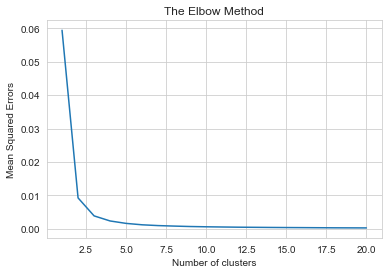

<Figure size 720x576 with 0 Axes>

In [90]:
wcss=[]
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(ret_var_val)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Mean Squared Errors')
plt.figure(figsize=(10,8))
plt.show()


In [112]:
kmean = KMeans(n_clusters= 5,init = 'k-means++', random_state = 0)
val = kmean.fit_predict(ret_var_val)
ret_var['cluster'] = val

In [94]:
ret_var.head()

,Returns,Variance,cluster
SP500,0.000279,0.003567,0
NASDAQ.AAL,0.000441,0.014326,2
NASDAQ.AAPL,0.000855,0.009879,3
NASDAQ.ADBE,0.001144,0.009637,3
NASDAQ.ADI,0.000198,0.012395,3


In [95]:
# Depending on the clusters we can classify which all stocks are equal in nature

### Problem 2:
#### How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

In [120]:
set(val.tolist())

{0, 1, 2, 3, 4}